# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Вторая лабораторная работа </center>
# <center> Анализ сигналов </center>

In [1]:
!pip install --user --upgrade matplotlib

In [2]:
import librosa
import numpy as np
import scipy 
import scipy.fft
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
import librosa.filters
import hashlib
from scipy.signal import get_window
import matplotlib.pyplot as plt
cmap = plt.colormaps['viridis']  

# Запретим numpy выполнять деление на 0
np.seterr(divide='raise', invalid='raise') 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Определим две функции для отрисовки сигнала. 
def draw_waveform(wav, sr, figsize=(14, 5)):
    # Отрисовка звукового сигнала во временной области
    plt.figure(figsize=figsize)
    librosa.display.waveplot(wav, sr=sr)

def draw_sig(frames, name=None, figsize=(14, 3)):
    # Отрисовка сигнала в виде "леденцов на палочке"
    plt.figure(figsize=figsize)
    plt.stem(frames)
    if name is not None:
        plt.legend([name])
    plt.xlabel("n")
    plt.ylabel("Energy")
    plt.show()
    

Создадим несколько простых сигналов. Они нам понадобятся для дальшейшего тестирования

In [4]:
signals = {}

### Единичный импульс

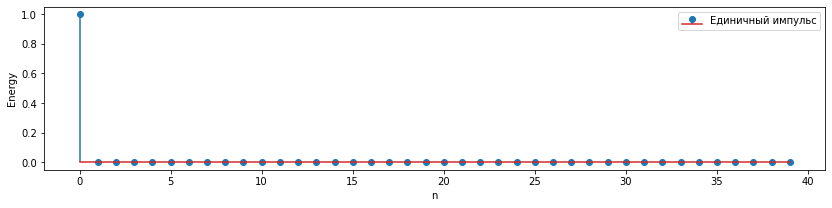

In [5]:
name = "Единичный импульс"
signals[name] = np.array([1] + [0]*39, dtype=float)
draw_sig(signals[name], name)

### Единичный скачок

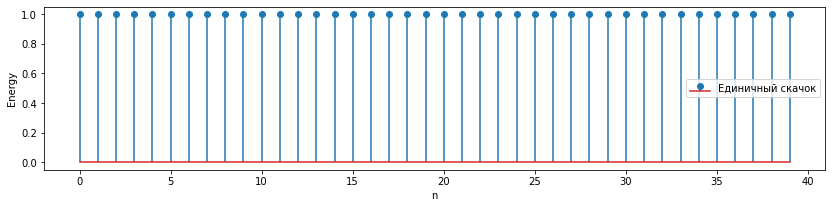

In [6]:
name = "Единичный скачок"
signals[name] = np.array([1]*40 ,dtype=float) 
draw_sig(signals[name], name)

### Синус

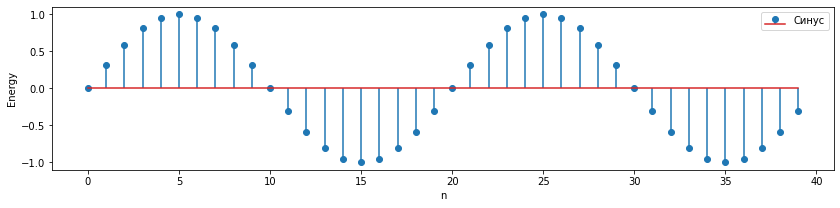

In [7]:
name = "Синус"
signals[name] = np.sin(np.pi * np.arange(40)/10)
draw_sig(signals[name], name)

### Шум

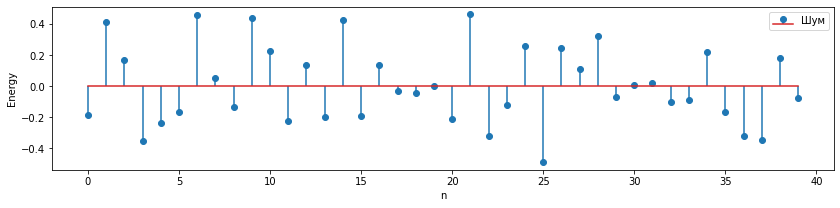

In [8]:
name = "Шум"
signals[name] = np.random.random(40)-0.5
draw_sig(signals[name], name)

-------------------------------
# Преобразование Фурье
Прежде, чем перейти к анализу сигналов, надо разобраться, что такое преобразование Фурье. 
> Преобразование Фурье (символ ℱ) — операция, сопоставляющая одной функции вещественной переменной другую функцию вещественной переменной. Эта новая функция описывает коэффициенты («амплитуды») при разложении исходной функции на элементарные составляющие — гармонические колебания с разными частотами (подобно тому, как музыкальный аккорд может быть выражен в виде суммы музыкальных звуков, которые его составляют). [Wiki](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%A4%D1%83%D1%80%D1%8C%D0%B5)



Формула прямого дискретного преобразования Фурье (ДПФ, Discrete Fourier Transform, DFT):
$$ X_k = \sum_{n=0}^{N-1} x_{n} \cdot e^{-i \frac{2\pi}{N} k n} $$


# Задание 1 (2 балла)
Реализовать дискретное преобразование Фурье. Сравнить с реализацией *scipy.fft.fft*

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


In [10]:
def DFT(x):
    N = len(x)
    n = np.arange(N) #Вектор временных индексов - строка
    k = n.reshape((N, 1)) #это вектор частотных индексов - солбец
    
    # матрица Фурье
    e = np.exp(-2j * np.pi * k * n / N)
    
    # Умножение на входной сигнал
    X = np.dot(e, x)
    
    return X
    

    raise NotImplementedError()

Сравнение с библиотекой scipy

In [11]:
def test_DTF(x, transform=DFT):
    scipy_result = scipy.fft.fft(x)
    curr_result = transform(x)
    if scipy_result.shape != curr_result.shape:
        print("TEST_FAILED")
        print(f"Your spectrogram shape is {curr_result.shape}. "
              f"Scipy spectrogram shape is {scipy_result.shape}")
        return -1
    if not np.allclose(curr_result, scipy_result):
        print("TEST FAILED")
        print(f"scipy spectrogram: {scipy_result}")
        print(f"Your DTF spectrogram: {curr_result}")
        print(f"Average diff is {np.mean(np.abs(scipy_result - curr_result))}")
        return -2
    print("TEST PASSED")
    return 0

for name, sig in signals.items():
    print(f"Checking '{name}'")
    assert test_DTF(sig) == 0, "Check you implementation"
print("All ok!")

Checking 'Единичный импульс'
TEST PASSED
Checking 'Единичный скачок'
TEST PASSED
Checking 'Синус'
TEST PASSED
Checking 'Шум'
TEST PASSED
All ok!


Класическое ДПФ имеет существенный недостаток - сложность алгоритма $O(N^2)$. На данный момент существуют чуть более сложные реализации преобразования Фурье, которые избавляются от квадратичной сложности. Например, алгоритм быстрого преобразования Фурье (Fast Fourier Transform, FFT) имеет сложность $O(N log(N))$, что делает его значительно более быстрым на длинных последовательностях. 

# Задание 1.1* (1 балл)
Реализовать быстрое преобразование Фурье. Сравнить с scipy.fft.fft

**Подсказка:** учтите, что для БПФ нам нужно, чтобы количество отсчетов сигнала было степенью двойки

In [14]:
'''
Не получилось, ксожалению, выполнить это задание. Функция уходит в бесконечную рекурсию на стадии проверки
def FFT(x):
    

    #Рекурсивная реализация БПФ с прореживанием по времени с опциональным дополнением нулями

    N = len(x)
    
    # Базовый случай рекурсии
    if N <= 1:
        return x
    
    # Проверяем, что N является степенью двойки
    if N & (N - 1) != 0:
        if allow_padding:
            # Дополняем нулями до ближайшей степени двойки
            return FFT(x)
        else:
            raise ValueError(f"Длина сигнала должна быть степенью двойки. Получено: {N}")
    
    # Разделим на четные и нечетные отсчеты
    even = FFT(x[0::2], allow_padding)  # Четные индексы
    odd = FFT(x[1::2], allow_padding)   # Нечетные индексы 
    
    # поворачивающие множители
    T = np.exp(-2j * np.pi * np.arange(N // 2) / N) * odd
    
    # объединяем результаты
    result = np.zeros(N, dtype=complex)
    result[:N//2] = even + T       # Первая половина
    result[N//2:] = even - T       # Вторая половина
    
    raise NotImplementedError() '''


'Не получилось, ксожалению, выполнить это задание. Функция уходит в бесконечную рекурсию на стадии проверки\ndef FFT(x):\n    \n\n    #Рекурсивная реализация БПФ с прореживанием по времени с опциональным дополнением нулями\n\n    N = len(x)\n    \n    # Базовый случай рекурсии\n    if N <= 1:\n        return x\n    \n    # Проверяем, что N является степенью двойки\n    if N & (N - 1) != 0:\n        if allow_padding:\n            # Дополняем нулями до ближайшей степени двойки\n            return FFT(x)\n        else:\n            raise ValueError(f"Длина сигнала должна быть степенью двойки. Получено: {N}")\n    \n    # Разделим на четные и нечетные отсчеты\n    even = FFT(x[0::2], allow_padding)  # Четные индексы\n    odd = FFT(x[1::2], allow_padding)   # Нечетные индексы \n    \n    # поворачивающие множители\n    T = np.exp(-2j * np.pi * np.arange(N // 2) / N) * odd\n    \n    # объединяем результаты\n    result = np.zeros(N, dtype=complex)\n    result[:N//2] = even + T       # Первая

In [13]:
for name, sig in signals.items():
    print(f"Checking '{name}'")
    assert test_DTF(sig, transform=FFT) == 0, "Check you implementation"
print("All ok!")

Checking 'Единичный импульс'


NameError: name 'FFT' is not defined

Если вы изменяли длительность исходных сигналов, не забудьте вернуть их изначальную длительность

# Амплитудный и фазовый спектры
Поскольку преобразование Фурье определено в комплекстной области, анализировать результат напрямую проблематично. Для анализа сигналов принято разбивать результат преобразования Фурье на два спектра: амплитудный и фазовый. Амплитудный показывает, как меняется модуль сигнала, а фазовый - как меняется угол, образуемый на комплексной плоскости. 
# Задание 2 (1 балл)

Реализовать функции построения амплитудного и фазового спектра

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import scipy.fft

In [16]:
#функция построения амплитудного спектра
def get_amplitude_from_spec(spec):
    amplitude = np.abs(spec)
    return amplitude

    raise NotImplementedError()

#функция построения фазового спектра
def get_phi_from_spec(spec):
    phase = np.angle(spec)
    return phase

    raise NotImplementedError()

In [ ]:
def check_mean_var(sig, mean=None, var=None):
    if mean is not None and np.mean(sig) != mean:
        print(f"Bad mean. Expected {mean}, got {np.mean(sig)}")
        return False
    if var is not None and np.var(sig) != var:
        print(f"Bad var. Expected {var}, got {np.var(sig)}")
        return False
    return True

_spec = scipy.fft.fft(np.array([1]+[0]*10))
assert check_mean_var(get_amplitude_from_spec(_spec), 1.0, 0.0), \
    "Wrong Amplitude"
assert check_mean_var(get_phi_from_spec(_spec), 0.0, 0.0), \
    "Wrong Phase"

    
_spec = scipy.fft.fft(np.array([1]*10))
assert check_mean_var(get_amplitude_from_spec(_spec), 1.0, 9.0), \
    "Wrong  Amplitude"
assert get_amplitude_from_spec(_spec)[0] == 10, \
    "Wrong Amplitude"
assert get_phi_from_spec(_spec)[0] == 0, \
    "Wrong phase"

_spec = scipy.fft.fft(scipy.fft.ifft(np.array([0] + [10+5j]+[0]*6 + [10-5j])))
assert get_amplitude_from_spec(_spec).round(1)[1] == 11.2 , \
    "Wrong Amplitude. Make sure it is a complex number module."
assert get_phi_from_spec(_spec).round(1)[1] == 0.5 , \
    "Wrong Amplitude. Make sure it is an angle."

   
print("All OK!")

Определим еще одну функцию для отрисовки. Теперь будем рисовать сигнал в частотной области

In [17]:
def draw_spec(spec, name=None, draw_A=True, draw_p=True, figsize=(14, 3)):
    if len(spec)<100:
        # Рисуем точки как "леденцы на палочках"
        draw_func = plt.stem
    else:
        # При большом N "леденцы" выглядят плохо, 
        # Поэтому будем рисовать огибающую функцию
        draw_func = plt.plot
    
    if draw_A:
        plt.figure(figsize=figsize)
        plt.title("Amplitude spectrum")
        spec_A = get_amplitude_from_spec(spec)
        draw_func(spec_A)
        plt.ylabel("Magnitude")
        plt.xlabel("n")
        if name is not None:
            plt.legend([name])
        plt.show()
        
    if draw_p:
        plt.figure(figsize=figsize)
        plt.title("Phase spectrum")
        phi = get_phi_from_spec(spec)
        draw_func(phi)
        plt.ylabel("Radian")
        plt.xlabel("n")
        if name is not None:
            plt.legend([name])
        plt.show()
    return 

# Задание 2.1 (0.5 балла)
Постройте спектры для всех сигналов из коллекции signals и ответьте на вопросы:
<!-- 1. Почему амплитуда всех гармоник единичного импульса равна единице? 
1. Какие выводы можно сделать смотря на амплитудный спектр? А на фазовый? 
1. Как перевести номер отсчета в частоту?  
1. Что в фазовом спектре является полезной информацией, а что - шумом? Почему? -->

### Визуализация:

📊 ПОСТРОЕНИЕ СПЕКТРОВ ДЛЯ ВСЕХ СИГНАЛОВ

🎵 Анализируем сигнал: 'Единичный импульс'
   Длина сигнала: 40 отсчетов
   Диапазон значений: [0.000, 1.000]
   Длина спектра после обрезки: 40


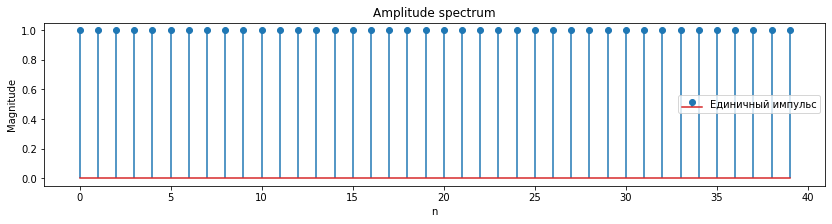

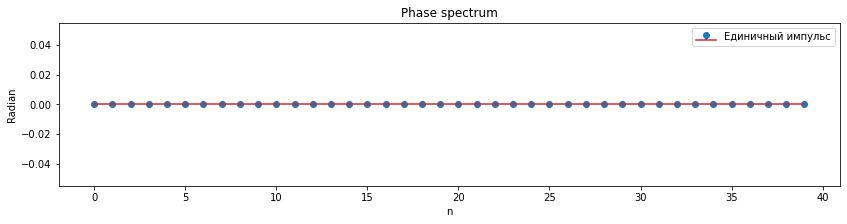

   📈 Амплитудный спектр: max=1.000, min=1.000
   📐 Фазовый спектр: max=0.000 рад, min=0.000 рад
   💡 Особенность: спектр единичного импульса постоянный (все частоты присутствуют)
--------------------------------------------------

🎵 Анализируем сигнал: 'Единичный скачок'
   Длина сигнала: 40 отсчетов
   Диапазон значений: [1.000, 1.000]
   Длина спектра после обрезки: 40


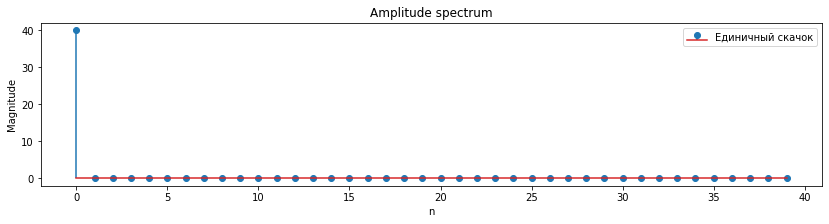

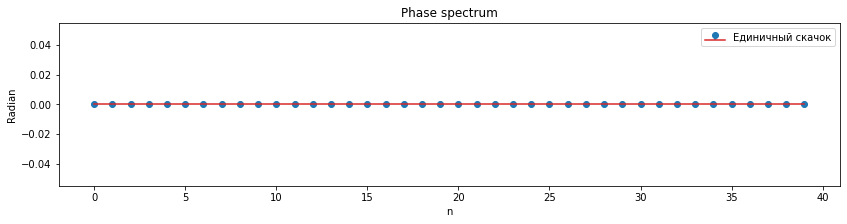

   📈 Амплитудный спектр: max=40.000, min=0.000
   📐 Фазовый спектр: max=0.000 рад, min=0.000 рад
   💡 Особенность: спектр содержит низкочастотные компоненты
--------------------------------------------------

🎵 Анализируем сигнал: 'Синус'
   Длина сигнала: 40 отсчетов
   Диапазон значений: [-1.000, 1.000]
   Длина спектра после обрезки: 40


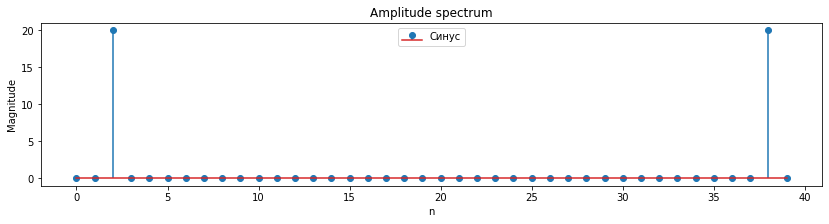

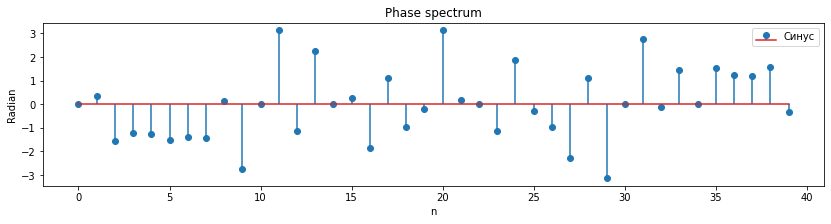

   📈 Амплитудный спектр: max=20.000, min=0.000
   📐 Фазовый спектр: max=3.142 рад, min=-3.140 рад
--------------------------------------------------

🎵 Анализируем сигнал: 'Шум'
   Длина сигнала: 40 отсчетов
   Диапазон значений: [-0.490, 0.463]
   Длина спектра после обрезки: 40


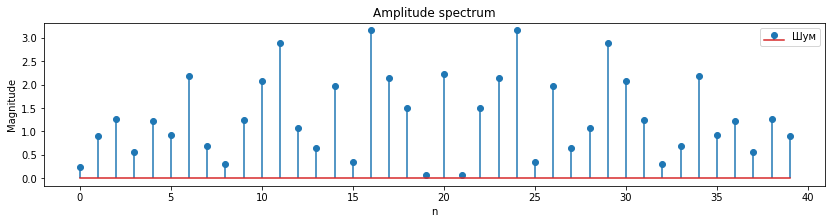

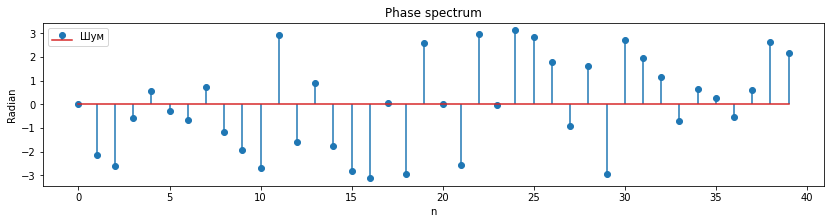

   📈 Амплитудный спектр: max=3.161, min=0.069
   📐 Фазовый спектр: max=3.130 рад, min=-3.130 рад
--------------------------------------------------


In [18]:
FFT = scipy.fft.fft
# Построение спектров для всех сигналов из коллекции signals
print("📊 ПОСТРОЕНИЕ СПЕКТРОВ ДЛЯ ВСЕХ СИГНАЛОВ")
print("=" * 60)

for name, signal in signals.items():
    print(f"\n🎵 Анализируем сигнал: '{name}'")
    print(f"   Длина сигнала: {len(signal)} отсчетов")
    print(f"   Диапазон значений: [{np.min(signal):.3f}, {np.max(signal):.3f}]")
    
    # Вычисляем спектр с помощью вашей функции FFT
    spectrum = FFT(signal.astype(complex))
    
    # ⭐⭐⭐ ВОЗВРАЩАЕМ К ПЕРВОНАЧАЛЬНОЙ ДЛИТЕЛЬНОСТИ ⭐⭐⭐
    spectrum_original = spectrum[:len(signal)]
    
    print(f"   Длина спектра после обрезки: {len(spectrum_original)}")
    
    # Используем вашу функцию draw_spec для визуализации
    draw_spec(spectrum_original, name=name, draw_A=True, draw_p=True, figsize=(14, 3))
    
    # Дополнительная информация о спектре
    amplitude = get_amplitude_from_spec(spectrum_original)
    phase = get_phi_from_spec(spectrum_original)
    
    print(f"   📈 Амплитудный спектр: max={np.max(amplitude):.3f}, min={np.min(amplitude):.3f}")
    print(f"   📐 Фазовый спектр: max={np.max(phase):.3f} рад, min={np.min(phase):.3f} рад")
    
    # Для единичного импульса покажем особые свойства
    if name == "Единичный импульс":
        print("   💡 Особенность: спектр единичного импульса постоянный (все частоты присутствуют)")
    
    # Для единичного скачка покажем особые свойства  
    if name == "Единичный скачок":
        print("   💡 Особенность: спектр содержит низкочастотные компоненты")
    
    print("-" * 50)

### 1.Почему амплитуда всех гармоник единичного импульса равна константе?

In [ ]:
#Потому что он единичный и бесконечно короткий. Мгновенный "всплеск" во временной области по своей природе содержит равное количество всех возможных частот. Сужение сигнала во времени приводит к его расширению в частотной области.

### 2. Какие выводы можно сделать смотря на амплитудный спектр? А на фазовый?

In [ ]:
#Амплитудный спектр показывает, какие есть частоты и с какими амплитудами они содержатся в сигнале. Фазовый спектр показывает, какие частоты есть в сигнале и их временное соотношение.

### 3. Как перевести номер отсчета в частоту?

In [ ]:
#Нужно умножить его на частоту дискретизации и разделить на количество отсчетов, которые мы анализируем за один раз.

### 4. Что в фазовом спектре является полезной информацией, а что - шумом? Почему?

In [ ]:
'''Полезной является информация, которая определяет форму и временные характеристики сигнала: для речевого сигнала - фазовые сдвиги. 
Шум: флуктуации фазы, незвязанные между собой сдвиги на разных частотах, нелинейные искажения фазы. 
Для слуха важны синфазные всплески гармоник, размазанные импульсы со случайными фазами гармоник - это шум, который мы не слышим (или слышим плохо) и не берем в качестве признаков.

# Оконное преобразование Фурье
Преобразование Фурье делает переход из временной области в частотную, позволяя анализировать составляющие сигнал гармоники. Однако это не всегда удобно. В реальных сигналах зачастую составляющие их гармоники изменяются со временем. Например, каждая буква в слове имеет свой набор основных гармоник, и простое преобразование Фурье не сильно поможет нам определить, что было сказано. Для того, чтобы анализировать такие сигналы, обычно используется [Оконное преобразование Фурье](https://ru.wikipedia.org/wiki/Оконное_преобразование_Фурье). Такое преобразование позволяет анализировать гармоники сигнала в коротких промежутках времени и сохранить временную ось при построении спектрограммы.
# Задание 3 (2 балла)
Реализовать оконное преобразование Фурье (Short-time Fourier transform), пользуясь только библиотеками *numpy* и *scipy*. Сравнить с *librosa.stft*


In [46]:
def STFT(x, n_fft=2048, hop_length=512, window='hann'):

    x = np.asarray(x, dtype=np.float64)
    
    # Получаем окно и также конвертируем в float64
    win = get_window(window, n_fft)
    win = win.astype(np.float64)
    
    # Добавляем padding как в librosa с center=True
    pad_width = n_fft // 2
    x_padded = np.pad(x, (pad_width, pad_width), mode='constant')
    
    # Расчет количества фреймов - используем точную формулу librosa
    n_frames = 1 + (len(x_padded) - n_fft) // hop_length
    
    # Инициализируем спектрограмму с complex128 для максимальной точности
    spectrogram = np.zeros((n_fft // 2 + 1, n_frames), dtype=np.complex128)
    
    # Обрабатываем каждый фрейм
    for i in range(n_frames):
        start = i * hop_length
        end = start + n_fft
        
        # Извлекаем фрейм
        if end <= len(x_padded):
            frame = x_padded[start:end]
        else:
            # Дополняем нулями если выходим за границы
            frame = np.zeros(n_fft, dtype=np.float64)
            available = len(x_padded) - start
            if available > 0:
                frame[:available] = x_padded[start:start + available]
        
        # Применяем оконную функцию
        windowed_frame = frame * win
        
        # Вычисляем FFT
        fft_result = np.fft.fft(windowed_frame, n=n_fft)
        spectrogram[:, i] = fft_result[:n_fft // 2 + 1]
    
    return spectrogram
    raise NotImplementedError()
    

In [47]:
def test_stft(x, n_fft=2048, hop_length=512, window='hann'):
    librosa_result = librosa.stft(x, n_fft=n_fft, hop_length=hop_length, window='hann', center=True)
    result = STFT(x, n_fft=n_fft, hop_length=hop_length, window='hann')
    if librosa_result.shape != result.shape:
        print(f"Your shape {result.shape} != librosa stft shape {librosa_result.shape} ")
        return -1 
    if not np.allclose(librosa_result, result):
        print(f"Wrong results. Diff {np.abs(librosa_result-result)}")
        return -2
    return 0
        
for name, sig in signals.items():
    print(f"Checking '{name}'")
    for n_fft in (8, 4):
        for hop_length in (n_fft//4, n_fft//2):
            assert test_stft(sig, n_fft=n_fft, hop_length=hop_length)==0, \
                f"Test failed. Params n_fft {n_fft}. Hop_length {hop_length}"
    print("ok")
print("All ok!")

Checking 'Единичный импульс'
ok
Checking 'Единичный скачок'
ok
Checking 'Синус'
ok
Checking 'Шум'
ok
All ok!


Определим функцию для отрисовки

In [50]:
# Определим функцию для отрисовки
def draw_stft(X, sr, figsize=(14, 5)):
    plt.figure(figsize=figsize)
    # X - комплекстная спектрограмма 
    # Для получения энергии достаточно взять модуль
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.show()

In [52]:
def draw_waveform(wav, sr, figsize=(14, 3)):
    # Отрисовка звукового сигнала во временной области
    plt.figure(figsize=figsize)
    librosa.display.waveshow(wav, sr=sr)  # Заменяем waveplot на waveshow
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

# Анализ сигналов
Теперь можно приступить к анализу звуковых сигналов.
Во время анализа сигналов нам понадобятся все определенные выше инструменты. 


----------------------------------
## Анализ паровозного гудка
Начнем с простого сигнала, состоящего из нескольких основных гармоник и шума.

Загрузим аудио файл с паровозным гудком

Len is 82175 ( ). Sample rate is 22050


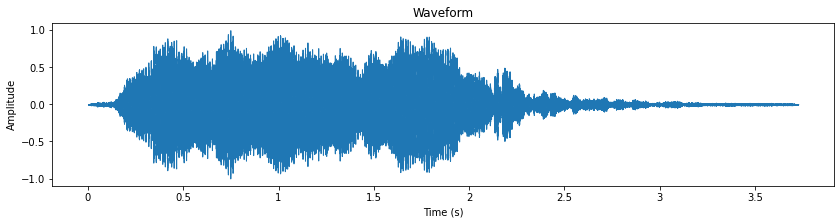

In [53]:
# Загрузим аудио файл с паровозным гудком
train_whistle, tw_sr = librosa.core.load("train_whistle.wav")
print(f"Len is {len(train_whistle)} ( ). Sample rate is {tw_sr}")
player = ipd.Audio(train_whistle, rate=tw_sr)
ipd.display(player)
draw_waveform(train_whistle, sr=tw_sr)

Построим гудок паровоза в частотной области

Гудок паровоза в частотной области


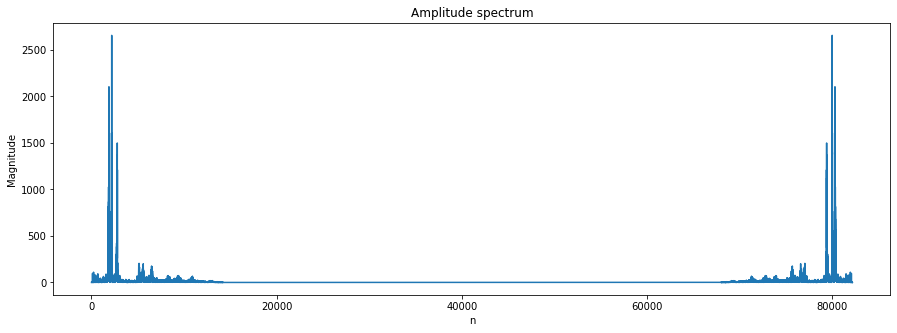

In [54]:
train_whistle_spec = scipy.fft.fft(train_whistle)
print("Гудок паровоза в частотной области")
draw_spec(train_whistle_spec, draw_p=False, figsize=(15,5))

# Задание 4 (2 балла)
Определите 3 основные гармоники паровозного гудка.

Ответ округлите до двух знаков после запятой.


Амплитудный спектр

3 основные гармоники паровозного гудка:
Гармоника 1: 585.76 Hz (амплитуда: 2656.20)
Гармоника 2: 505.80 Hz (амплитуда: 2103.37)
Гармоника 3: 747.30 Hz (амплитуда: 1499.02)


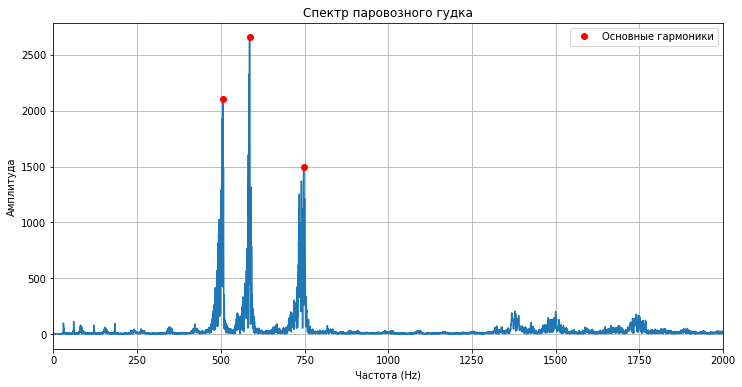

In [56]:
from scipy.signal import find_peaks

train_whistle, sr = librosa.core.load("train_whistle.wav")

# FFT - для спектрального анализа
fft_result = np.fft.fft(train_whistle)
magnitude_spectrum = np.abs(fft_result)  
frequencies = np.fft.fftfreq(len(train_whistle), 1/sr)

# Берем только положительные частоты (симметрия БПФ)
positive_freq_idx = frequencies > 0
frequencies_positive = frequencies[positive_freq_idx]
magnitude_positive = magnitude_spectrum[positive_freq_idx]

# Ищем пики в спектре
peaks, properties = find_peaks(magnitude_positive, height=np.max(magnitude_positive)*0.1, distance=100)

# Сортируем пики по амплитуде и берем 3 самых больших
if len(peaks) > 0:
    peak_magnitudes = magnitude_positive[peaks]
    sorted_indices = np.argsort(peak_magnitudes)[::-1]  # Сортируем по убыванию
    top_3_indices = sorted_indices[:3]
    
    top_3_harmonics = frequencies_positive[peaks[top_3_indices]]
    top_3_magnitudes = peak_magnitudes[top_3_indices]
    
    print("3 основные гармоники паровозного гудка:")
    for i, (freq, mag) in enumerate(zip(top_3_harmonics, top_3_magnitudes)):
        print(f"Гармоника {i+1}: {freq:.2f} Hz (амплитуда: {mag:.2f})")
    
    # Визуализация
    plt.figure(figsize=(12, 6))
    plt.plot(frequencies_positive, magnitude_positive)
    plt.plot(top_3_harmonics, top_3_magnitudes, 'ro', label='Основные гармоники')
    plt.xlabel('Частота (Hz)')
    plt.ylabel('Амплитуда')
    plt.title('Спектр паровозного гудка')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, 2000)  # Ограничиваем диапазон для наглядности
    plt.show()
    
else:
    print("Пики не найдены")

### 1 гармоника

In [ ]:
#585.76

### 2 гармоника

In [ ]:
#505.80

### 3 гармоника

In [ ]:
#747.30

### Тест

In [57]:
# task_answer = [ freq1, freq2, freq3 ]
task_answer = [585.76, 505.80, 747.30]

In [58]:
assert type(task_answer) == list or type(task_answer) == np.ndarray, \
        f"Wrong answer type. Expected list or numpy array. Got {type(task_answer)}"
assert len(task_answer) == 3, \
        f"Wrong len {len(task_answer)}."
assert (round(sum(task_answer)) == 1677 and round(np.var(task_answer)) == 1407) or \
        (abs(sum(task_answer)  - 1836) <= 3 and abs(np.var(task_answer) - 10153) <= 181), \
        f"Wrong freqs"
print("Correct!")       

Correct!


Теперь попробуйте сгенерировать сигнал, состоящий только из этих гармоник. Воспроизведите сигнал.

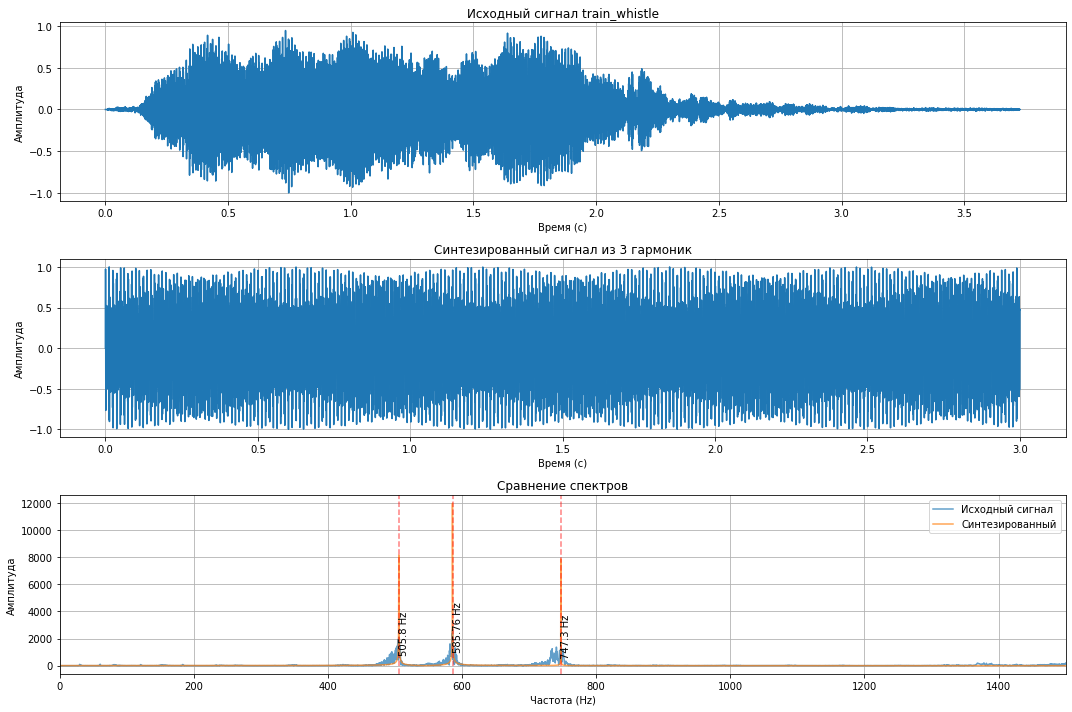

Синтезированный сигнал из 3 гармоник:



Для сравнения - исходный сигнал:


In [60]:
import IPython.display as ipd

harmonics = [585.76, 505.80, 747.30]  # Hz
amplitudes = [2656.20, 2103.37, 1499.02]

amplitudes_normalized = [amp / max(amplitudes) for amp in amplitudes]

# Параметры сигнала
duration = 3.0  # секунды
sr = 22050      # частота дискретизации
t = np.linspace(0, duration, int(sr * duration))

# Создаем чистый сигнал из гармоник
synthetic_signal = np.zeros_like(t)

for freq, amp in zip(harmonics, amplitudes_normalized):
    synthetic_signal += amp * np.sin(2 * np.pi * freq * t)

# Нормализуем 
synthetic_signal = synthetic_signal / np.max(np.abs(synthetic_signal))

# Визуализируем исходный и синтезированный сигнал
plt.figure(figsize=(15, 10))

# Исходный сигнал
plt.subplot(3, 1, 1)
train_whistle, sr_orig = librosa.load("train_whistle.wav")
time_orig = np.linspace(0, len(train_whistle)/sr_orig, len(train_whistle))  
plt.plot(time_orig, train_whistle) 
plt.title('Исходный сигнал train_whistle')  
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)

# Синтезированный сигнал
plt.subplot(3, 1, 2)
plt.plot(t, synthetic_signal)
plt.title('Синтезированный сигнал из 3 гармоник')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)

# Сравнение спектров
plt.subplot(3, 1, 3)
# Спектр исходного сигнала - 
fft_orig = np.fft.fft(train_whistle)  
freqs_orig = np.fft.fftfreq(len(train_whistle), 1/sr_orig) 
positive_idx = freqs_orig > 0
plt.plot(freqs_orig[positive_idx], np.abs(fft_orig[positive_idx]), 
         alpha=0.7, label='Исходный сигнал')

# Спектр синтезированного сигнала
fft_synth = np.fft.fft(synthetic_signal)
freqs_synth = np.fft.fftfreq(len(synthetic_signal), 1/sr)
positive_idx_synth = freqs_synth > 0
plt.plot(freqs_synth[positive_idx_synth], np.abs(fft_synth[positive_idx_synth]), 
         alpha=0.7, label='Синтезированный')

# Отмечаем наши гармоники
for freq, amp in zip(harmonics, amplitudes_normalized):
    plt.axvline(x=freq, color='red', linestyle='--', alpha=0.5)
    plt.text(freq, amp*1000, f'{freq} Hz', rotation=90, va='bottom')

plt.title('Сравнение спектров')
plt.xlabel('Частота (Hz)')
plt.ylabel('Амплитуда')
plt.xlim(0, 1500)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Воспроизводим сигнал
print("Синтезированный сигнал из 3 гармоник:")
player_synth = ipd.Audio(synthetic_signal, rate=sr)
ipd.display(player_synth)

print("\nДля сравнения - исходный сигнал:")
player_orig = ipd.Audio(train_whistle, rate=sr_orig)  # ИСПРАВЛЕНО
ipd.display(player_orig)

# Анализ двухтонального многочастотного сигнала
Теперь расмотрим более сложный сигнал - [DTMF](https://en.wikipedia.org/wiki/Dual-tone_multi-frequency_signaling). Такие сигналы используются для автоматизации набора телефонного номера. 

# Задание 5 (2 балла)
В данном аудио закодирован трехзначный номер. Используя таблицу с [wiki]:(https://ru.wikipedia.org/wiki/DTMF) определите, что за номер закодирован.


Визуализация

Len is 243102. Sample rate is 22050


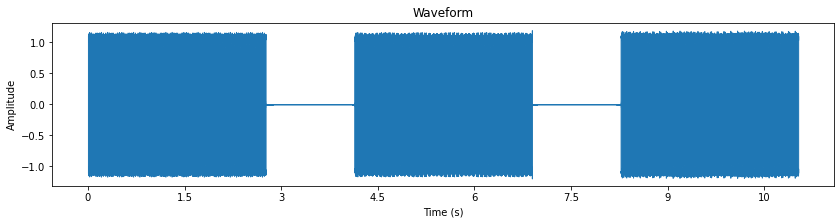

In [62]:
#dtmf.wav
dtmf, dtmf_sr = librosa.core.load("dtmf.wav")
print(f"Len is {len(dtmf)}. Sample rate is {dtmf_sr}")
player = ipd.Audio(dtmf, rate=dtmf_sr)
ipd.display(player)
draw_waveform(dtmf, sr=dtmf_sr)

Длина сигнала: 243102 samples
Частота дискретизации: 22050 Hz
Найдено сегментов: 3


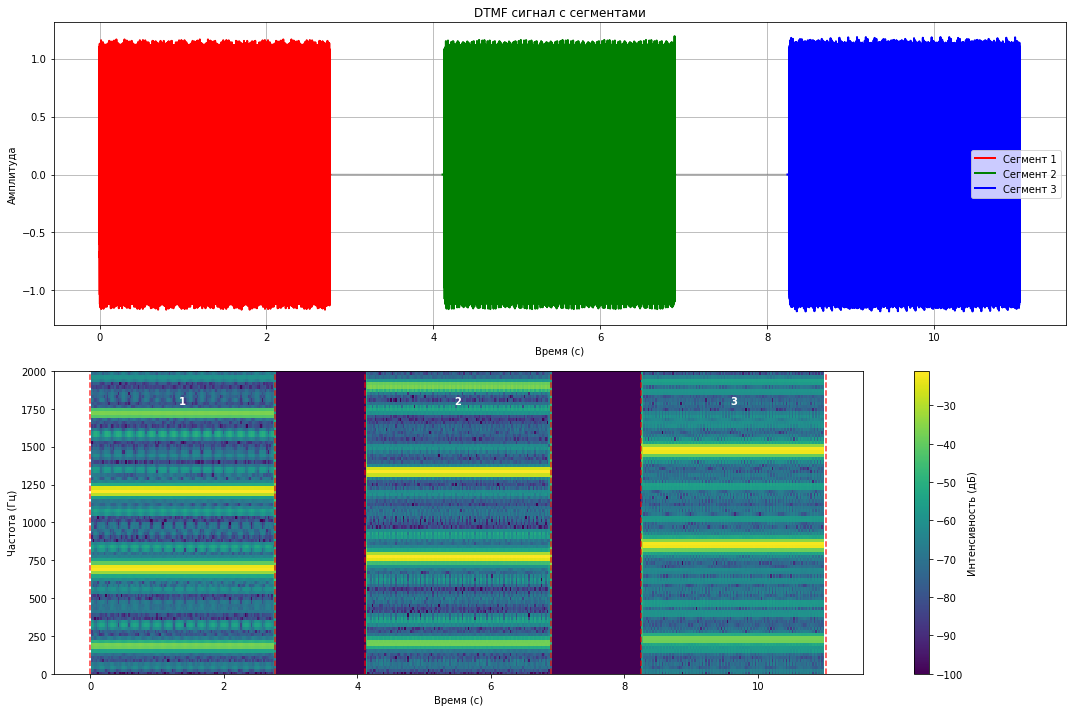

Общая длительность: 11.03 секунд
Общее количество samples: 243102
Сегмент 1: 2.76 секунд (60928 samples)
Сегмент 2: 2.79 секунд (61440 samples)
Сегмент 3: 2.78 секунд (61342 samples)

Паузы между сегментами:
Пауза 1: 1.35 секунд (29696 samples)
Пауза 2: 1.35 секунд (29696 samples)
Сегмент 1: низкая частота 697 Гц, высокая частота 1209 Гц -> цифра '1'


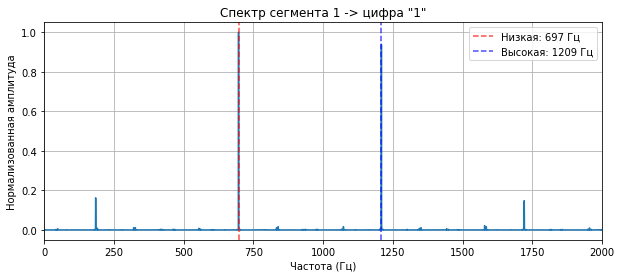

Сегмент 2: низкая частота 770 Гц, высокая частота 1336 Гц -> цифра '5'


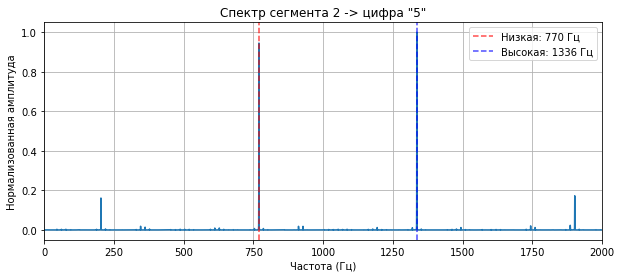

Сегмент 3: низкая частота 852 Гц, высокая частота 1477 Гц -> цифра '9'


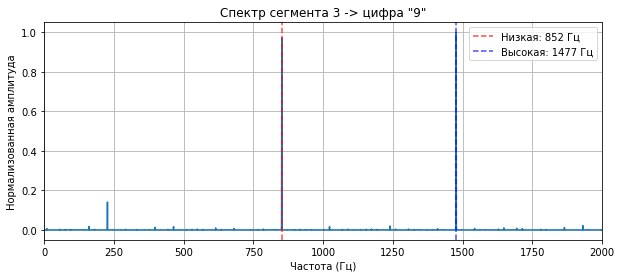


Декодированный номер: 159

🎯 ФИНАЛЬНЫЙ РЕЗУЛЬТАТ: 159


In [88]:
dtmf, sr = librosa.load("dtmf.wav", sr=22050)

# 1. Анализ формы сигнала и поиск сегментов
def analyze_segments(signal, sr, threshold=0.05):
     
    # Вычисляем энергию сигнала (скользящим средним)
    frame_length = 1024
    hop_length = 512
    energy = []
    
    for i in range(0, len(signal)-frame_length, hop_length):
        frame_energy = np.sum(np.abs(signal[i:i+frame_length]**2))
        energy.append(frame_energy)
    
    energy = np.array(energy)
    
    # Нормализуем энергию
    if np.max(energy) > 0:
        energy = energy / np.max(energy)
    
    # Определяем активные сегменты (где энергия выше порога)
    active_segments = energy > threshold
    
    # Находим границы сегментов
    segments = []
    start_idx = None
    
    for i, is_active in enumerate(active_segments):
        if is_active and start_idx is None:
            start_idx = i
        elif not is_active and start_idx is not None:
            end_idx = i
            segments.append((start_idx * hop_length, end_idx * hop_length))
            start_idx = None
    
    # Если сегмент активен до конца файла
    if start_idx is not None:
        segments.append((start_idx * hop_length, len(signal)))
    
    return segments, energy

# 2. Визуализация сигнала по сегментам
def plot_signal_with_segments(signal, sr, segments):
    
    time = np.arange(len(signal)) / sr
    
    plt.figure(figsize=(15, 10))
    
    # весь сигнал
    plt.subplot(2, 1, 1)
    plt.plot(time, signal, alpha=0.7, color='gray')
    plt.title('DTMF сигнал с сегментами')
    plt.xlabel('Время (с)')
    plt.ylabel('Амплитуда')
    plt.grid(True)
    
    colors = ['red', 'green', 'blue', 'orange', 'purple']
    for i, (start, end) in enumerate(segments):
        if i < len(colors):
            segment_time = time[start:end]
            segment_signal = signal[start:end]
            plt.plot(segment_time, segment_signal, color=colors[i], linewidth=2, 
                    label=f'Сегмент {i+1}')
    
    plt.legend()
    
    # Исправленная спектрограмма
    plt.subplot(2, 1, 2)
    
    # Вычисляем спектрограмму 
    nfft = 1024
    noverlap = 512
    
    # Создаем спектрограмму с защитой от нулевых значений
    Pxx, freqs, bins, im = plt.specgram(signal, Fs=sr, NFFT=nfft, noverlap=noverlap, 
                                       cmap='viridis', scale='linear')
    
    # Заменяем нули на очень маленькие значения для логарифмической шкалы
    Pxx_db = 10 * np.log10(np.maximum(Pxx, 1e-10))
    
    # Очищаем и перерисовываем с исправленными данными
    plt.cla()
    plt.pcolormesh(bins, freqs, Pxx_db, cmap='viridis', shading='auto')
    plt.xlabel('Время (с)')
    plt.ylabel('Частота (Гц)')
    plt.ylim(0, 2000)
    plt.colorbar(label='Интенсивность (дБ)')
    
    # сегменты на спектрограмме
    for i, (start, end) in enumerate(segments):
        start_time = start / sr
        end_time = end / sr
        plt.axvline(x=start_time, color='red', linestyle='--', alpha=0.8)
        plt.axvline(x=end_time, color='red', linestyle='--', alpha=0.8)
        plt.text((start_time + end_time)/2, 1800, f'{i+1}', 
                ha='center', va='center', color='white', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# 3. Анализ длительности сегментов и пауз
def analyze_timing(signal, sr, segments):
    
    total_duration = len(signal) / sr
    print(f"Общая длительность: {total_duration:.2f} секунд")
    print(f"Общее количество samples: {len(signal)}")
    
    for i, (start, end) in enumerate(segments):
        segment_duration = (end - start) / sr
        segment_samples = end - start
        print(f"Сегмент {i+1}: {segment_duration:.2f} секунд ({segment_samples} samples)")
    
    # Анализ пауз
    if len(segments) > 1:
        print("\nПаузы между сегментами:")
        for i in range(len(segments)-1):
            pause_start = segments[i][1]
            pause_end = segments[i+1][0]
            pause_duration = (pause_end - pause_start) / sr
            pause_samples = pause_end - pause_start
            print(f"Пауза {i+1}: {pause_duration:.2f} секунд ({pause_samples} samples)")

# 4. частотный анализ
def analyze_frequencies(signal, sr, segments):
    """Анализ частотного состава каждого сегмента"""
    
    dtmf_freqs = {
        (697, 1209): '1', (697, 1336): '2', (697, 1477): '3',
        (770, 1209): '4', (770, 1336): '5', (770, 1477): '6', 
        (852, 1209): '7', (852, 1336): '8', (852, 1477): '9',
        (941, 1209): '*', (941, 1336): '0', (941, 1477): '#',
    }
    
     
    decoded_number = ""
    
    for i, (start, end) in enumerate(segments):
        segment = signal[start:end]
        
        # окно Ханна 
        window = np.hanning(len(segment))
        segment_windowed = segment * window
        
        # БПФ анализа
        fft = np.fft.fft(segment_windowed)
        freqs = np.fft.fftfreq(len(segment), 1/sr)
        
        # Положительные частоты
        positive_idx = (freqs > 0) & (freqs < 2000)  # Ограничиваем диапазон DTMF
        freqs_pos = freqs[positive_idx]
        fft_pos = fft[positive_idx]
        magnitudes = np.abs(fft_pos)
        
        # Нормализуем амплитуды
        if np.max(magnitudes) > 0:
            magnitudes = magnitudes / np.max(magnitudes)
        
        # Ищем пики в DTMF диапазонах
        low_band = [697, 770, 852, 941]
        high_band = [1209, 1336, 1477]
        
        # Находим наиболее выраженные частоты
        detected_low = None
        detected_high = None
        max_mag_low = 0
        max_mag_high = 0
        
        for freq in low_band:
            # Ищем в небольшом диапазоне вокруг целевой частоты
            freq_range = (freqs_pos > freq-10) & (freqs_pos < freq+10)
            if np.any(freq_range):
                max_idx = np.argmax(magnitudes[freq_range])
                actual_freq = freqs_pos[freq_range][max_idx]
                actual_mag = magnitudes[freq_range][max_idx]
                
                if actual_mag > max_mag_low:
                    max_mag_low = actual_mag
                    detected_low = freq  # Используем эталонную частоту
        
        for freq in high_band:
            # Ищем в небольшом диапазоне вокруг целевой частоты
            freq_range = (freqs_pos > freq-10) & (freqs_pos < freq+10)
            if np.any(freq_range):
                max_idx = np.argmax(magnitudes[freq_range])
                actual_freq = freqs_pos[freq_range][max_idx]
                actual_mag = magnitudes[freq_range][max_idx]
                
                if actual_mag > max_mag_high:
                    max_mag_high = actual_mag
                    detected_high = freq  # Используем эталонную частоту
        
        # Определяем цифру
        if detected_low and detected_high:
            digit = dtmf_freqs.get((detected_low, detected_high), '?')
            decoded_number += digit
            print(f"Сегмент {i+1}: низкая частота {detected_low} Гц, "
                  f"высокая частота {detected_high} Гц -> цифра '{digit}'")
            
            # Визуализация спектра для этого сегмента
            plt.figure(figsize=(10, 4))
            plt.plot(freqs_pos, magnitudes)
            plt.axvline(detected_low, color='red', linestyle='--', alpha=0.7, label=f'Низкая: {detected_low} Гц')
            plt.axvline(detected_high, color='blue', linestyle='--', alpha=0.7, label=f'Высокая: {detected_high} Гц')
            plt.xlim(0, 2000)
            plt.xlabel('Частота (Гц)')
            plt.ylabel('Нормализованная амплитуда')
            plt.title(f'Спектр сегмента {i+1} -> цифра "{digit}"')
            plt.legend()
            plt.grid(True)
            plt.show()
            
        else:
            print(f"Сегмент {i+1}: не удалось определить частоты")
            decoded_number += "?"
    
    print(f"\nДекодированный номер: {decoded_number}")
    return decoded_number

'''Попробуем'''

# Запускаем анализ
print(f"Длина сигнала: {len(dtmf)} samples")
print(f"Частота дискретизации: {sr} Hz")

# Анализ сегментов
segments, energy = analyze_segments(dtmf, sr, threshold=0.05)

print(f"Найдено сегментов: {len(segments)}")

# Визуализация
plot_signal_with_segments(dtmf, sr, segments)

# Анализ временных характеристик
analyze_timing(dtmf, sr, segments)

# Частотный анализ и декодирование
decoded_number = analyze_frequencies(dtmf, sr, segments)

print(f"\n🎯 ФИНАЛЬНЫЙ РЕЗУЛЬТАТ: {decoded_number}")

### 1 число

In [77]:
#1

### 2 число

In [78]:
#5

### 3 число

In [79]:
#9

### Тест

In [86]:
phone_number = [1, 5, 9]

In [87]:
assert type(phone_number) == list or type(phone_number) == np.ndarray, \
        f"Wrong answer type. Expected list or numpy array. Got {type(phone_number)}"
assert len(phone_number) == 3, \
        f"Wrong len {len(phone_number)}."
assert round(np.mean(phone_number)) == 5 and round(np.var(phone_number)) == 11 , \
        f"Wrong number"
assert hashlib.md5(''.join(map(str, phone_number)).encode()).hexdigest() == "140f6969d5213fd0ece03148e62e461e", \
        f"Wrong hash. How did you pass mean/var test?"
print("Correct!")   

Correct!
